In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy.ndimage.filters import gaussian_filter

# Limit must be a multiple of binwidth and tickwidth
limit = 5000
tickwidth = 1000
binwidth = 100

def plot(infile, outfile):
    print("Processing ", infile)
    with open(infile, "r") as f:
        content = f.read()
        values = np.array([int(x) for x in content.split(',')[:-1]])
        print(np.sort(values))

    print("Num values: {}/{}".format((values > 0).sum(), values.size))
    print(f"Deadline misses (>{limit//1000}ms) = ", np.sum(values > limit))
    print(f"Std Dev = " + str(round(np.std(values))) + " us")
    print(f"Mean = " + str(round(np.mean(values))) + " us")
    print("--------------")

    fig, (ax, ax2) = plt.subplots(1, 2)
    plt.rcParams['figure.figsize'] = [14, 6]

    # Obtain bins and clipped values > limit
    bins = np.arange(0, limit + binwidth + 1, binwidth)
    clipped_values = np.clip(values, bins[0], bins[-1])

    # Generate plot
    sns.histplot(clipped_values, bins=bins, stat='proportion', ax=ax)
    sns.ecdfplot(clipped_values, color='orange', stat='proportion', linewidth=3, ax=ax)

    # Set plot labels and width
    ax.set_xlim(right=limit+2*binwidth)

    ticks = np.arange(0, limit + tickwidth, tickwidth)
    xlabels = (ticks//1000).astype(str);
    xlabels[-1] = xlabels[-1] + '>'

    #ticks = np.append(ticks, limit + tickwidth);
    #xlabels = np.append(xlabels, ">" + xlabels[-1])

    #print(bins)
    #print(ticks)

    ax.set_xticks(ticks)
    ax.set_xticklabels(xlabels)
    ax.set_ylabel('Density')
    ax.set_xlabel('Transmission time (ms)')

    ax2.set_ylabel('Transmission time (ms)')
    ax2.set_xlabel('Packet #')
    ax2.plot(values/1000)
    #ax2.plot(gaussian_filter(values/1000, sigma=10))
    plt.title(infile.name)
    #ax.plot(values)
    #plt.savefig(outfile)
    #plt.close()



Processing  client_compute_results/noblocking-pi3-pi4.results
[       0        0        0 ... 10473643 10473650 10473837]
Num values: 5388/6000
Deadline misses (>5ms) =  5381
Std Dev = 4809086 us
Mean = 3610509 us
--------------
Processing  client_compute_results/nuc-nuc-25000.results
[ 297  304  306 ...  796 1039 1389]
Num values: 60000/60000
Deadline misses (>5ms) =  0
Std Dev = 60 us
Mean = 517 us
--------------
Processing  client_compute_results/nuc-nuc-8mod.results
[   321    327    337 ... 100659 102667 402939]
Num values: 30000/30000
Deadline misses (>5ms) =  26
Std Dev = 2494 us
Mean = 654 us
--------------
Processing  client_compute_results/nuc-nuc.results
[ 487  530  534 ... 2138 2268 3857]
Num values: 30000/30000
Deadline misses (>5ms) =  0
Std Dev = 182 us
Mean = 1079 us
--------------
Processing  client_compute_results/pi3-pi4-2mod.results
[ 1085  1086  1087 ... 15778 18356 21035]
Num values: 6000/6000
Deadline misses (>5ms) =  7
Std Dev = 864 us
Mean = 1981 us
-----------

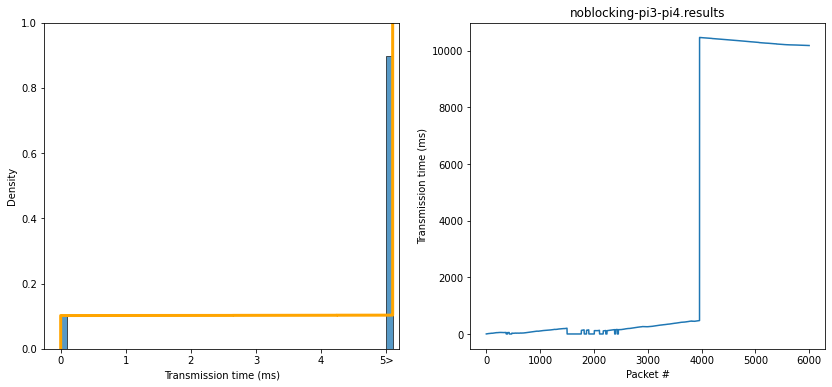

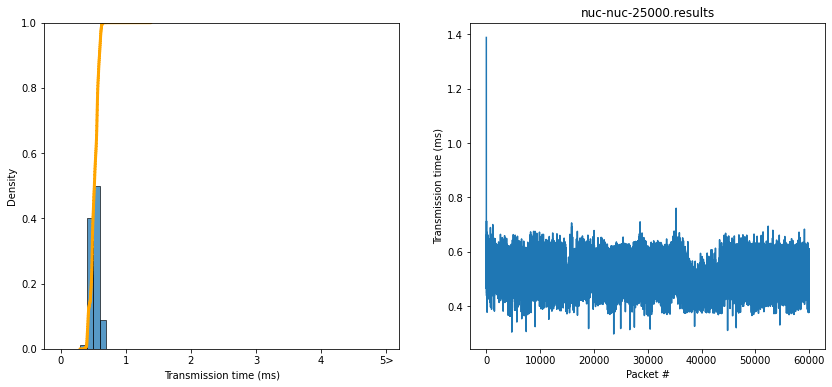

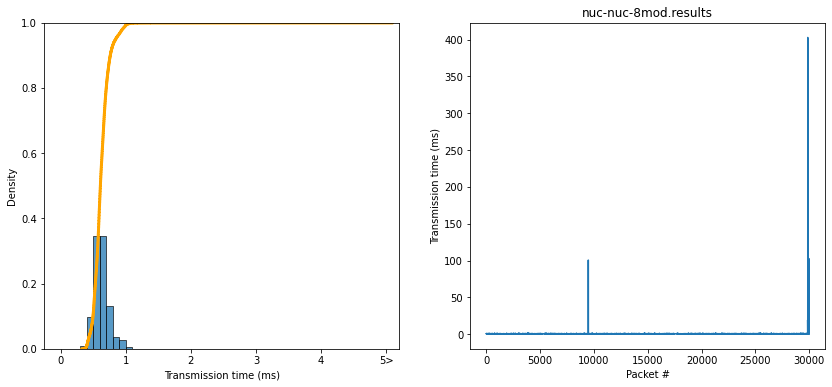

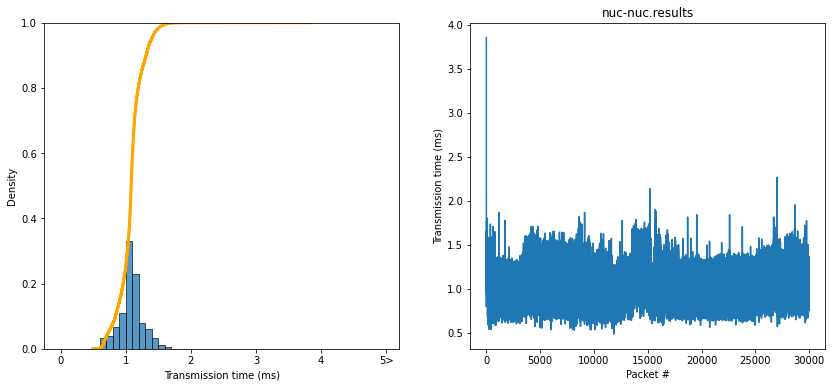

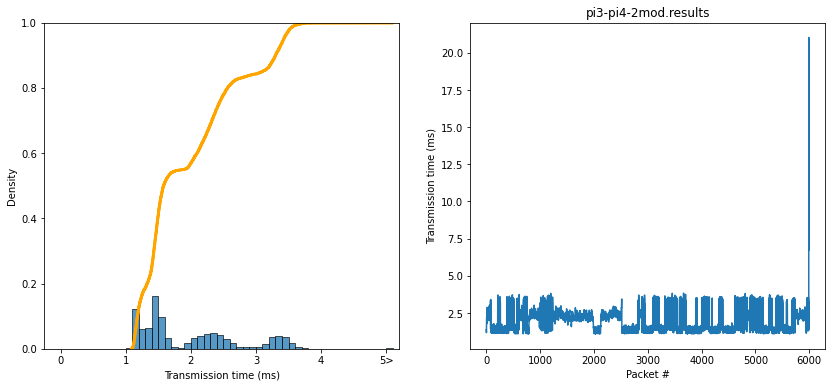

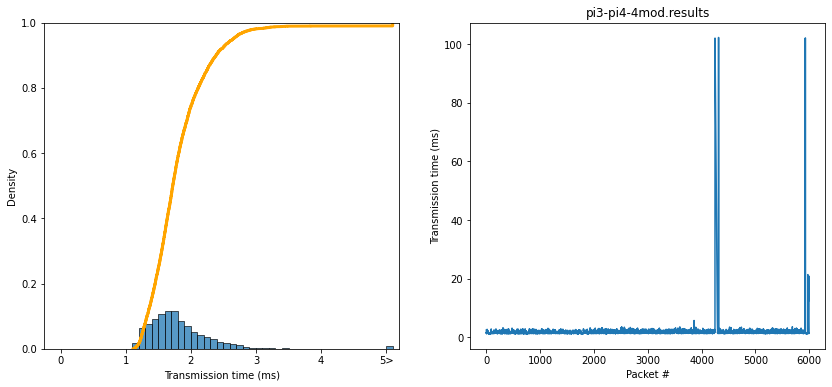

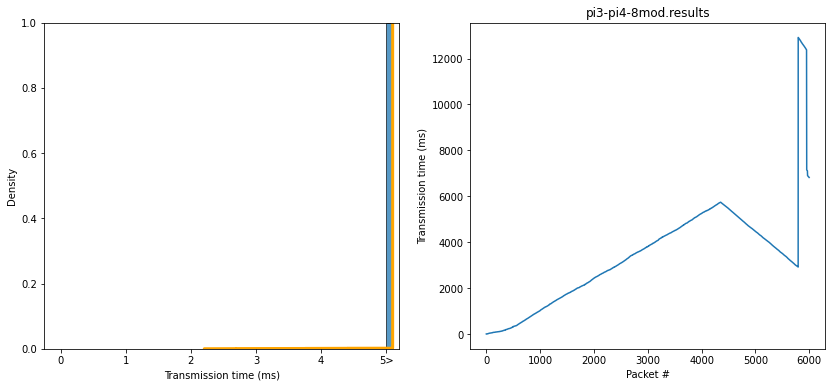

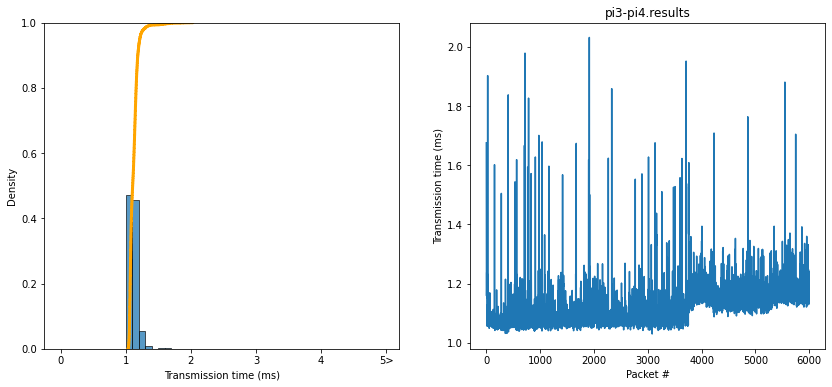

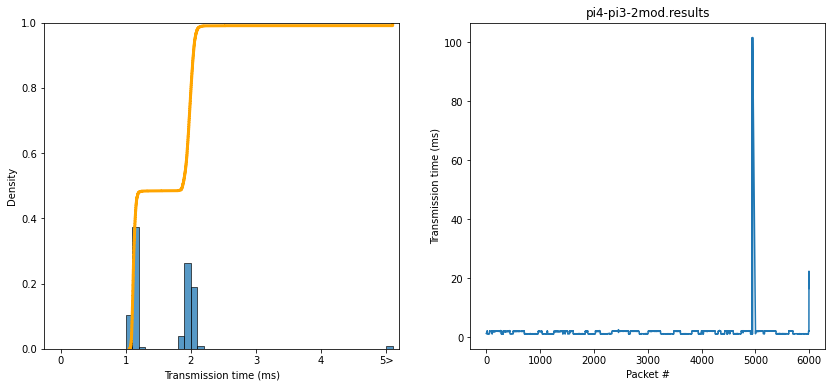

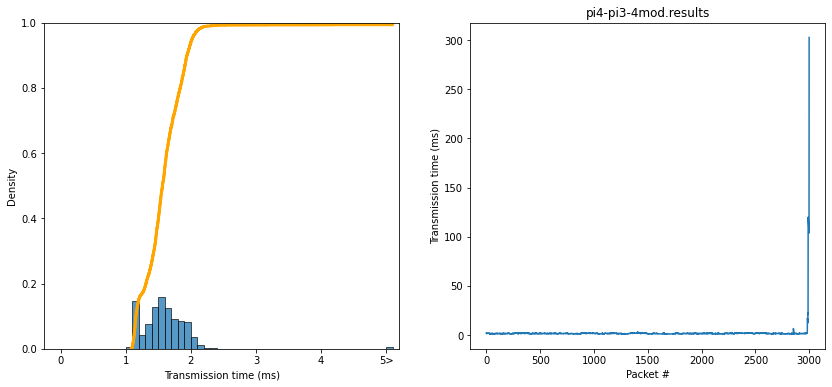

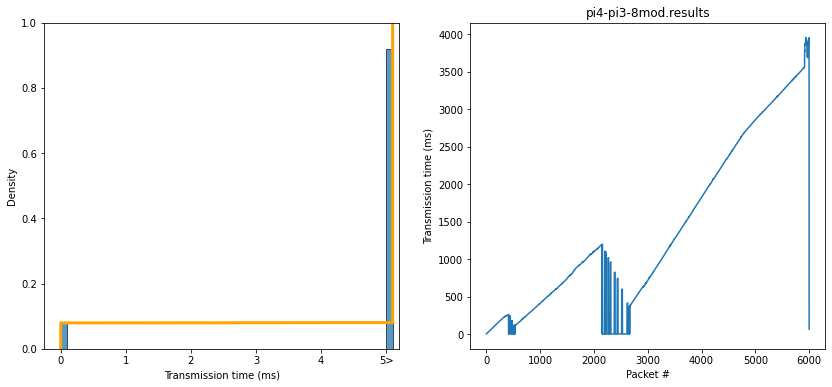

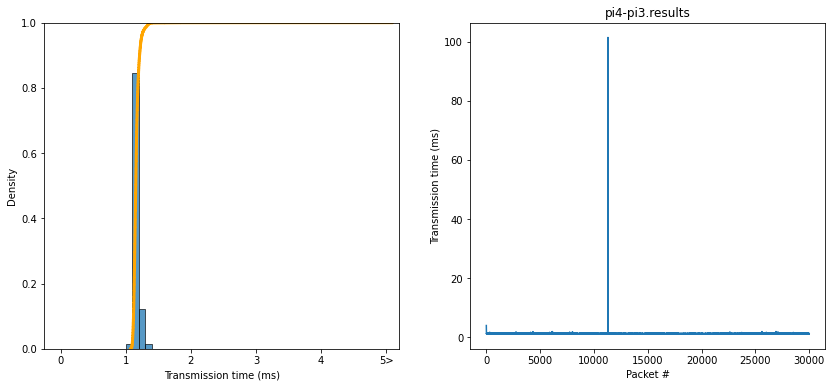

In [50]:
res_dir = Path('client_compute_results')
for infile in sorted(res_dir.glob('*')):
    outfile = Path("client_compute_plots") / Path(infile.with_suffix('.png').name)
    plot(infile, outfile)